# Домашная работа. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [7]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


Text(0.5, 1.0, 'Writing Score')

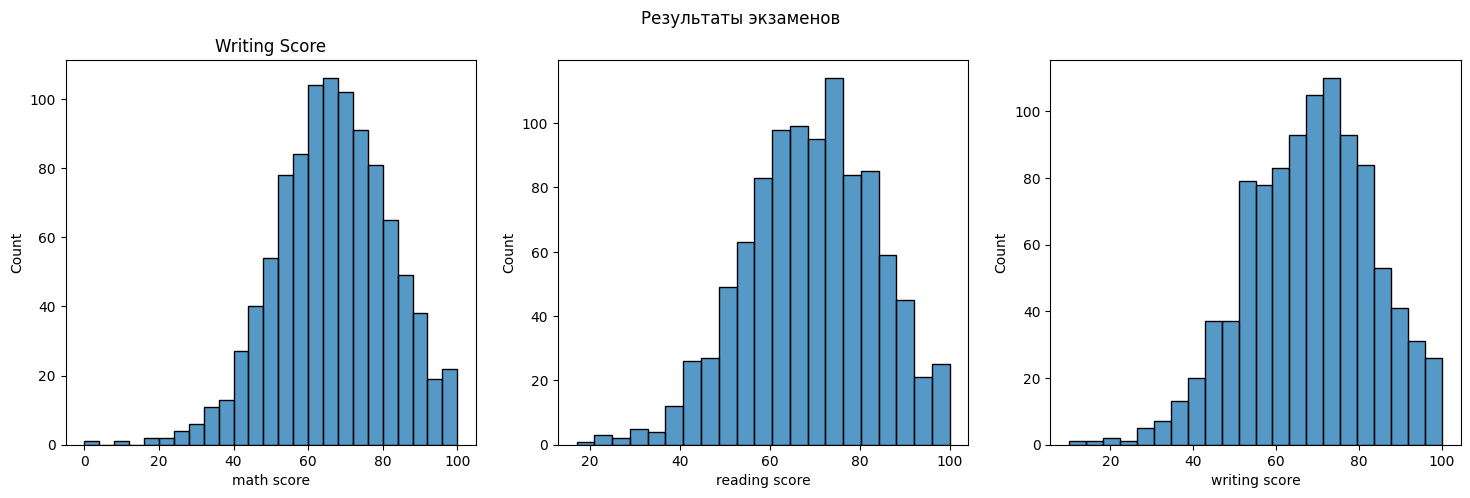

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Результаты экзаменов')
sns.histplot(df['math score'], ax=axes[0])
axes[0].set_title('Math Score')
sns.histplot(df['reading score'], ax=axes[1])
axes[0].set_title('Reading Score')
sns.histplot(df['writing score'], ax=axes[2])
axes[0].set_title('Writing Score')

In [22]:
math = df['math score'].median()
read = df['reading score'].median()
write = df['writing score'].median()
print(f"math: {math} read: {read} write: {write}")

math: 66.0 read: 70.0 write: 69.0


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


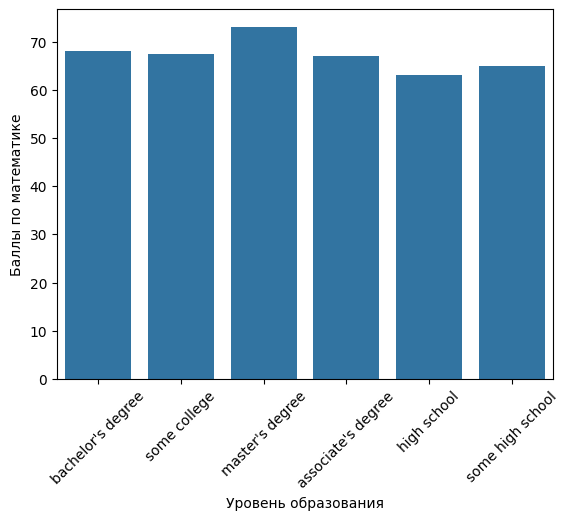

In [96]:
education_levels = df['parental level of education'].value_counts()
print(education_levels)
sns.barplot(x='parental level of education', y='math score', data=df, estimator=lambda x: x.median(), errorbar=None)
plt.xlabel('Уровень образования')
plt.ylabel('Баллы по математике')
plt.xticks(rotation=45)
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [57]:
students = df[
      (df['gender'] == 'female') &
      (df['math score'] > 90) &
      (df['reading score'] > 90) &
      (df['writing score'] > 90)]
print(len(students))

17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [70]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
comparison= df.groupby('gender').agg(
    min_score=('total_score', 'min'),
    max_score=('total_score', 'max'),
    median_score=('total_score', 'median')
)
print(comparison)

        min_score  max_score  median_score
gender                                    
female         27        300         211.0
male           69        300         199.0


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [71]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
prep_lunch_impact = df.groupby(['gender', 'lunch', 'test preparation course']).agg(
    avg_score=('total_score', 'mean')
)
print(prep_lunch_impact)

                                              avg_score
gender lunch        test preparation course            
female free/reduced completed                208.585714
                    none                     178.504202
       standard     completed                232.438596
                    none                     212.883721
male   free/reduced completed                197.163934
                    none                     174.971429
       standard     completed                220.539823
                    none                     196.458128


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

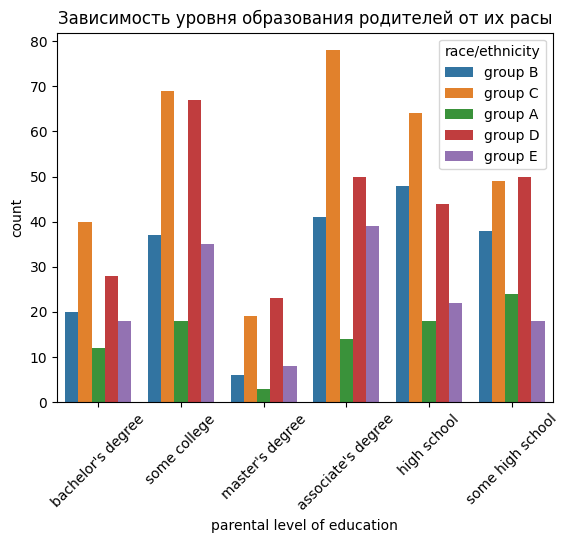

In [101]:
sns.countplot(x='parental level of education', hue='race/ethnicity', data=df)
plt.xticks(rotation=45)
plt.title('Зависимость уровня образования родителей от их расы')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


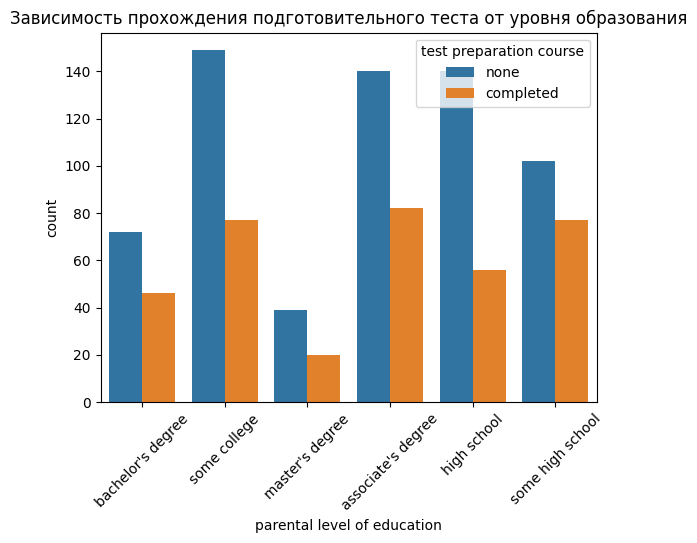

In [100]:
sns.countplot(x='parental level of education', hue='test preparation course', data=df)
plt.xticks(rotation=45)
plt.title('Зависимость прохождения подготовительного теста от уровня образования')
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

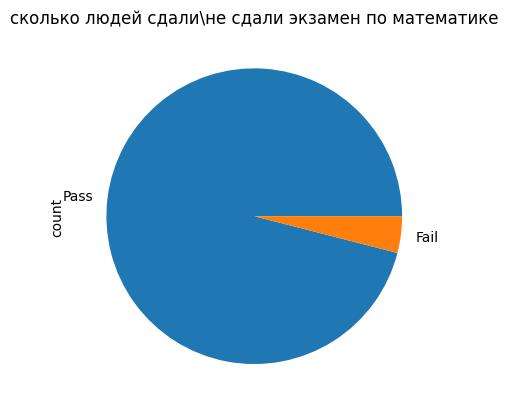

In [109]:
df['math pass/fail'] = df['math score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')
df['math pass/fail'].value_counts().plot.pie()
plt.title('сколько людей сдали\не сдали экзамен по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

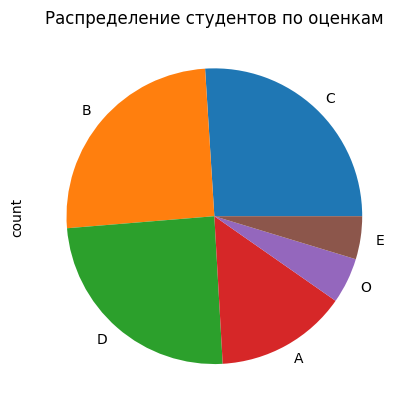

In [114]:
def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    avg_score = (row['math score'] + row['reading score'] + row['writing score']) / 3
    if avg_score <= 40:
        return 'E'
    elif avg_score <= 60:
        return 'D'
    elif avg_score <= 70:
        return 'C'
    elif avg_score <= 80:
        return 'B'
    elif avg_score <= 90:
        return 'A'
    else:
        return 'O'

df['grade'] = df.apply(assign_grade, axis=1)
df['grade'].value_counts().plot.pie()
plt.title('Распределение студентов по оценкам')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


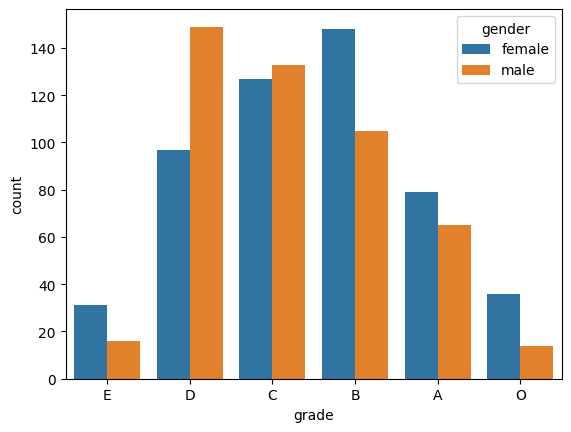

In [119]:
sns.countplot(x='grade', hue='gender', data=df, order=['E', 'D', 'C', 'B', 'A', 'O'])
plt.show()